# Flowchart for prediction pipeline

In [1]:
%matplotlib inline
# Static plots
#%matplotlib ipympl
# Interactive plots
import schemdraw
from schemdraw import flow

In [2]:
save_plot_flag = False

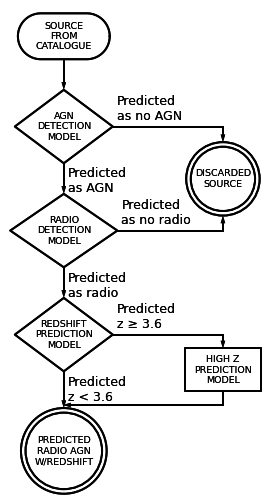

In [4]:
with schemdraw.Drawing(fontsize=11) as d:
      d += (initial := flow.Start(w=3, h=1.5).label('SOURCE\nFROM\nCATALOGUE'))
      d += flow.Arrow().down().length(d.unit/3)
      d += (AGN_model := flow.Decision(w=3.2, h=2.4, E='Predicted\nas no AGN', S='Predicted\nas AGN')
            .label('AGN\nDETECTION\nMODEL'))
      d += flow.Arrow().length(d.unit/3)
      d += (radio_model := flow.Decision(w=3.5, h=2.4, E='Predicted\nas no radio', S='Predicted\nas radio')
            .label('RADIO\nDETECTION\nMODEL'))
      d += flow.Arrow().length(d.unit/3)
      d += (full_z_model := flow.Decision(w=3.2, h=2.4, E='Predicted\nz \u2265 3.6', S='Predicted\nz < 3.6')
            .label('REDSHIFT\nPREDICTION\nMODEL'))
      d += flow.Line().right().at(full_z_model.E).length(d.unit*1.2)
      d += flow.Arrow().down().length(d.unit*0.15)
      d += (high_z_model := flow.Process(w=2.5, h=1.4).anchor('N')
            .label('HIGH Z\nPREDICTION\nMODEL'))

      d += (final_line := flow.Arrow().down().at(full_z_model.S).length(d.unit*0.4))
      d += (final_state := flow.StateEnd(r=1.4).label('PREDICTED\nRADIO AGN\nW/REDSHIFT'))
      d += flow.Line().right().at(AGN_model.E).length(d.unit*1.2)
      d += flow.Arrow().down().length(d.unit*0.17)
      d += (discarded := flow.StateEnd(r=1.2).anchor('N').label('DISCARDED\nSOURCE'))
      
      d += flow.Line().right().at(radio_model.E).tox(discarded.S)
      d += flow.Arrow().up().toy(discarded.S)

      d += flow.Line().down().at(high_z_model.S).length(d.unit*0.15)
      d += flow.Arrow().left().to(final_line.center)
      
      # d.draw()
      if save_plot_flag:
          d.save('plots/flowchart_pipeline_radio_AGN_z.pdf')